1. Напишите функцию, принимающую параметры lambda, n, N и запустите вышеописанный алгоритм N раз. По итогам моделирования запишите два массива:
    1) Массив с количеством успехов после каждой итерации алгоритма.
        Этот массив должен содержать N элементов.
    2) Массив с расстояниями между успехами из всех итераций.
        Количество элементов в этом массиве будет случайно
Постройте гистограммы по обоим массивам

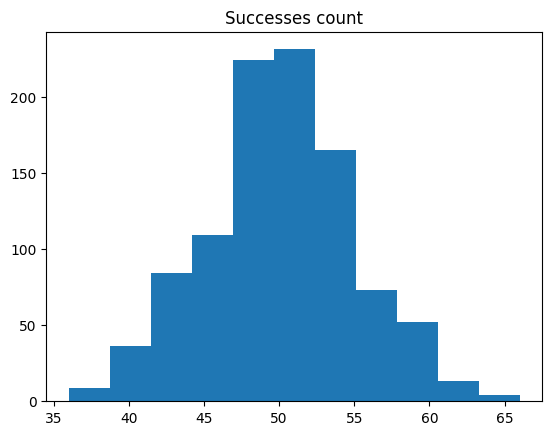

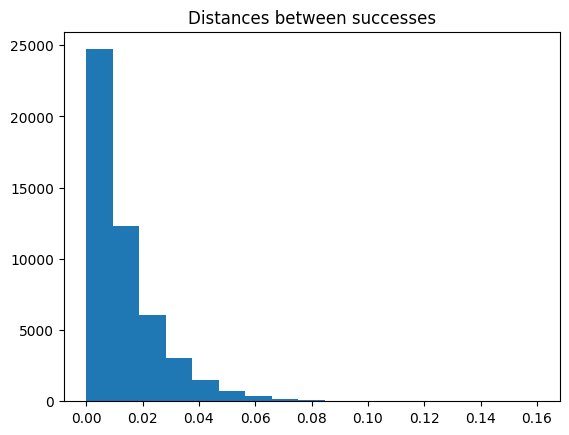

In [6]:
import random
import matplotlib.pyplot as plt


def run_bernoulli_once(lmb, n):
    p = min(lmb / n, 1)
    segments = []
    distances = []
    curr_distance = 0
    is_after_fst_success = False
    for i in range(n):
        rnd = random.random()
        trial = rnd < p
        if (not trial) and is_after_fst_success:
            curr_distance += 1 / n
        if trial and is_after_fst_success:
            distances.append(curr_distance)
            curr_distance = 0
        if trial:
            is_after_fst_success = True
        segments.append(trial)
    return segments, distances


def poisson_bernoulli(lmb, n, N):
    successes = []
    distances = []
    for i in range(N):
        local_successes, local_distances = run_bernoulli_once(lmb, n)
        successes.append(local_successes.count(True))
        for e in local_distances:
            distances.append(e)
    return successes, distances


sucs, dsts = poisson_bernoulli(50, 100, 1000)

plt.hist(sucs, bins='sturges')
plt.title("Successes count")
plt.show()

plt.hist(dsts, bins='sturges')
plt.title("Distances between successes")
plt.show()

2. Напишите функцию, принимающую параметры lambda, N и запустите вышеописанный алгоритм N раз.
    По итогам моделирования запишите массив с расстояниями между успехами из всех итераций. Постройте его гистограмму и сравните с соответствующей гистограммой из предыдущей секции.

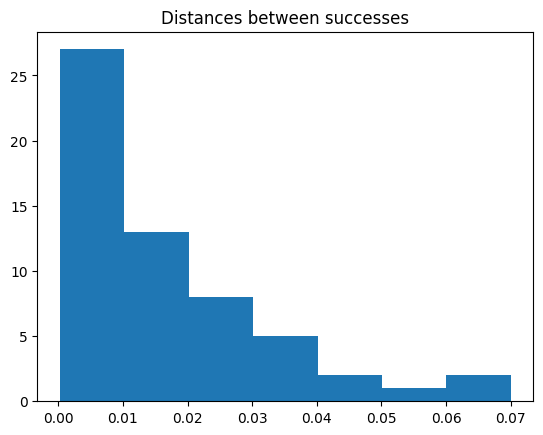

In [68]:
import numpy as np


def poisson_distribution(lmb, N):
    distances = []
    for _ in range(N):
        x = np.random.poisson(lmb)
        points = np.random.rand(x)
        points.sort()
        for i in range(x - 1):
            distances.append(points[i + 1] - points[i])
        return distances


dsts = poisson_distribution(50, 10000)

plt.hist(dsts, bins='sturges')
plt.title("Distances between successes")
plt.show()

3. Зная, что расстояние между точками/"успехами" имеет показательное распределение - придумайте свой алгоритм для моделирования процесса Пуассона на [0;1].

4. Напишите функцию, принимающую параметры lambda, N и запустите придуманный алгоритм N раз.
    По итогам моделирования запишите массив с количеством успехов после каждой итерации алгоритма. Постройте его гистограмму и сравните с соответствующей гистограммой из первой секции.

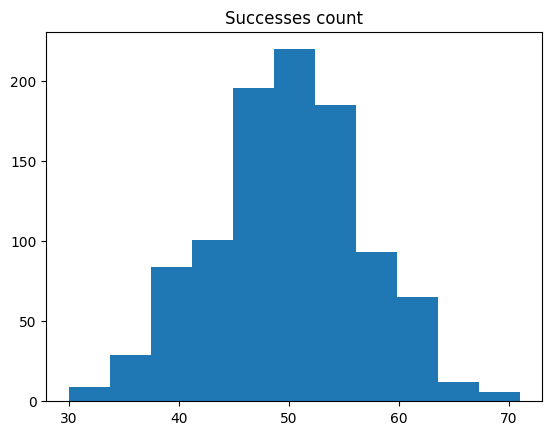

In [84]:
import numpy as np
import matplotlib.pyplot as plt


def poisson_process(lmb, N):
    successes = []
    for _ in range(N):
        t = 0
        count = 0
        while t < 1:
            t += np.random.exponential(1 / lmb)
            if t < 1:
                count += 1
        successes.append(count)
    return successes


successes = poisson_process(50, 1000)

plt.hist(successes, bins='sturges')
plt.title("Successes count")
plt.show()
